In [1]:
# 1 - Import libraries, Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (use raw string to avoid escape character issues)
dataset = pd.read_csv(r"C:\Users\afnan\Downloads\Predicting-Students-Marks-Based-on-Study-Hours-main\Predicting-Students-Marks-Based-on-Study-Hours-main\Student-Marks3-0-0.csv")

# Display all rows
dataset.head(len(dataset))


,time_study,Marks
0,NaN,19.202
1,0.096,600.660
2,3.133,13.811
3,7.909,49.018
4,7.811,55.299
...,...,...
174,993.120,10.844
175,NaN,19.590
176,4.869,21.379
177,20.000,4.000


In [2]:
#2-Data Preprocessing
#Remove missing values
dataset.dropna(inplace=True)

#Remove duplicates
dataset.drop_duplicates(inplace=True)

#Remove outliers
#Remove data points where Marks are below 0 or above 50
dataset = dataset[(dataset['Marks'] >= 0) & (dataset['Marks'] <= 50)]
#Remove data points where time_study are below 0 or above 8
dataset = dataset[(dataset['time_study'] >= 0) & (dataset['time_study'] <= 8)]

dataset.head(len(dataset))

,time_study,Marks
2,3.133,13.811
3,7.909,49.018
6,6.063,29.889
7,3.413,17.264
8,4.410,20.348
...,...,...
155,7.591,44.158
158,7.649,48.583
171,7.649,49.583
173,7.468,43.343


In [3]:
#View descriptive statistics
print(dataset.describe())

       time_study      Marks
count   97.000000  97.000000
mean     4.915454  27.595000
std      2.073553  13.110993
min      1.033000   6.053000
25%      3.211000  17.264000
50%      4.733000  24.394000
75%      6.594000  39.343000
max      7.957000  49.583000


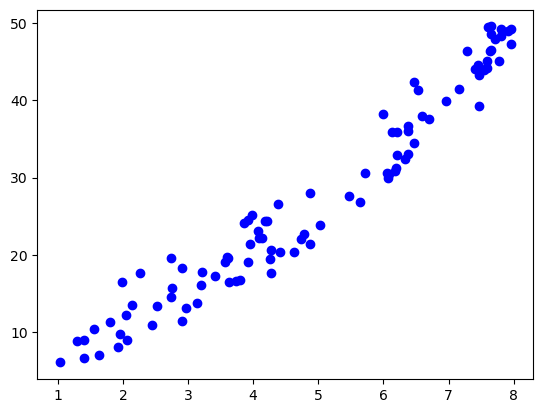

In [4]:
from sklearn.model_selection import train_test_split

#3-Split the data
#Split the data into features(X) and target(y)
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
#Can the data set be represented as a linear regression?
plt.scatter(x,y, color='blue')
plt.show()
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [5]:
from sklearn.linear_model import LinearRegression
#4-Train a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
#5-Make predictions on the test set
y_pred = model.predict(x_test)
y_pred
     

array([16.18017076, 17.6577973 , 34.85857641, 20.82413988, 35.69087217,
       37.31927692, 27.69359549, 19.76869235, 22.10273916, 17.5733615 ,
        6.70526755, 46.2815342 ,  9.16596806, 26.83717521, 24.06888713,
       14.90157147,  9.88970351, 22.91694154, 10.0766685 , 15.8303653 ,
       15.86052094, 43.22978307, 18.8760853 , 23.98445133, 44.42394655,
       12.9957348 , 23.73114392, 44.13445237, 36.49904342, 28.61032705,
       36.76441308, 41.492818  , 24.06888713])

In [7]:
y_test

array([13.119, 17.822, 29.889, 16.606, 32.957, 42.426, 28.043, 19.128,
       21.4  , 16.106,  8.92 , 47.321, 11.253, 22.073, 20.672, 15.725,
        8.1  , 22.171,  9.742, 11.397, 18.238, 44.544, 17.264, 19.466,
       46.583, 10.844, 24.318, 49.523, 32.357, 23.916, 36.746, 41.444,
       17.672])

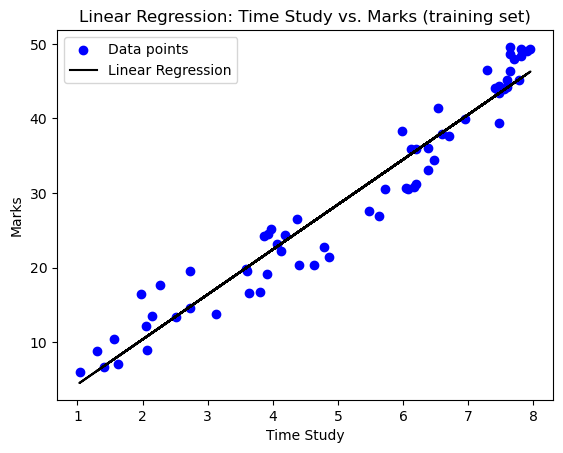

In [8]:
#6-Visualize the data points and Regression line

#Visualize the training set
#Scatter plot of the data points
plt.scatter(x_train, y_train, color='blue', label='Data points')

#Linear Regression line
plt.plot(x_train, model.predict(x_train), color='black', label='Linear Regression')

plt.xlabel('Time Study')
plt.ylabel('Marks')
plt.title('Linear Regression: Time Study vs. Marks (training set)')
plt.legend()
plt.show()

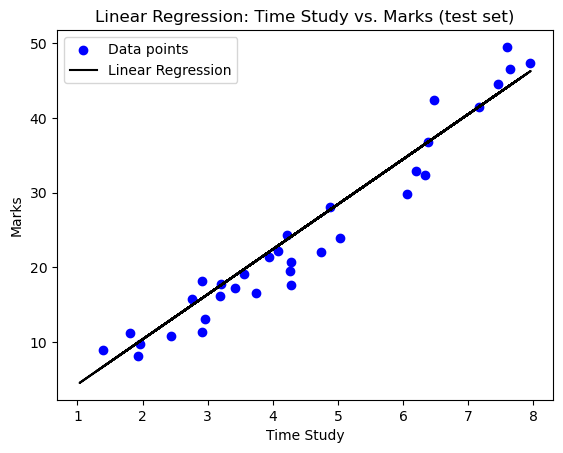

In [9]:
#Visualize the test set
#Scatter plot of the data points
plt.scatter(x_test, y_test, color='blue', label='Data points')

#Linear Regression line
plt.plot(x_train, model.predict(x_train), color='black', label='Linear Regression')

plt.xlabel('Time Study')
plt.ylabel('Marks')
plt.title('Linear Regression: Time Study vs. Marks (test set)')
plt.legend()
plt.show()

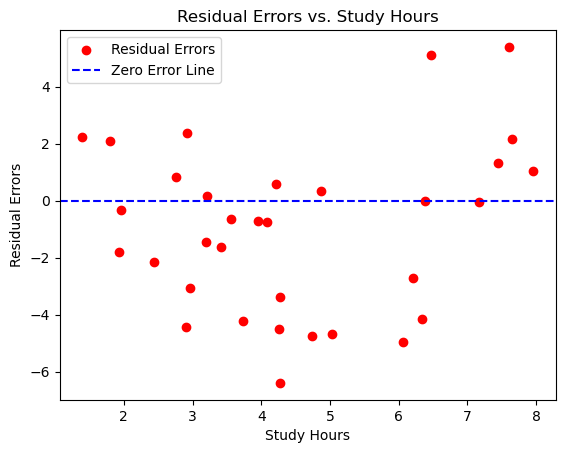

In [10]:
#7-Calculate and visualize the residual errors
residuals = y_test - y_pred

#Scatter plot of the residual errors
plt.scatter(x_test, residuals, color='red', label='Residual Errors', marker='o')

plt.xlabel('Study Hours')
plt.ylabel('Residual Errors')
plt.title('Residual Errors vs. Study Hours')

#Horizontal line at y=0 to indicate zero error
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Error Line')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#8-Measure the model's performance
#Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Absolute Error (MAE): 2.44
Mean Squared Error (MSE): 9.29
R-squared (R2): 0.94


In [12]:
#9-Check for overfitting and underfitting
#by comparing the performance metrics on the training and the test sets

#Make predictions on the training set
y_train_pred = model.predict(x_train)

#Evaluate model performance on the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Training Set Performance:')
print(f'Mean Absolute Error (MAE): {mae_train:.2f}')
print(f'Mean Squared Error (MSE): {mse_train:.2f}')
print(f'R-squared (R2): {r2_train:.2f}')
print('Test Set Performance:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Training Set Performance:
Mean Absolute Error (MAE): 2.57
Mean Squared Error (MSE): 9.92
R-squared (R2): 0.94
Test Set Performance:
Mean Absolute Error (MAE): 2.44
Mean Squared Error (MSE): 9.29
R-squared (R2): 0.94


In [13]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load and preprocess dataset
df = pd.read_csv(r"C:\Users\afnan\Downloads\Predicting-Students-Marks-Based-on-Study-Hours-main\Predicting-Students-Marks-Based-on-Study-Hours-main\Student-Marks3-0-0.csv")
df.dropna(inplace=True)
df = df[(df['Marks'] >= 0) & (df['Marks'] <= 50)]
df = df[(df['time_study'] >= 0) & (df['time_study'] <= 8)]

# Prepare data
X = df[['time_study']]
y = df['Marks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
mae = mean_absolute_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

# Tkinter App
class MarksApp:
    def __init__(self, root):
        self.root = root
        self.root.title("📘 Student Marks Predictor")
        self.root.geometry("500x500")
        self.root.configure(bg="#f7f9fc")
        self.create_widgets()

    def create_widgets(self):
        title = tk.Label(self.root, text="🎓 Study Hours → Marks Predictor", font=("Helvetica", 18, "bold"), fg="#2c3e50", bg="#f7f9fc")
        title.pack(pady=20)

        # Slider Frame
        slider_frame = tk.Frame(self.root, bg="#f7f9fc")
        slider_frame.pack(pady=10)

        self.study_hours = tk.DoubleVar(value=1.0)
        tk.Label(slider_frame, text="Select Study Hours (0 to 8):", font=("Helvetica", 12), bg="#f7f9fc").pack(pady=5)
        self.slider = ttk.Scale(slider_frame, from_=0, to=8, orient="horizontal", variable=self.study_hours, length=300)
        self.slider.pack()

        self.slider_value_label = tk.Label(slider_frame, text="1.0 Hours", font=("Helvetica", 12), bg="#f7f9fc", fg="#2980b9")
        self.slider_value_label.pack(pady=5)
        self.slider.bind("<Motion>", self.update_slider_value)

        # Predict Button
        tk.Button(self.root, text="🔍 Predict Marks", font=("Helvetica", 14), bg="#27ae60", fg="white", padx=20, pady=5, command=self.predict_marks).pack(pady=20)

        # Result Label
        self.result_label = tk.Label(self.root, text="", font=("Helvetica", 20, "bold"), fg="#8e44ad", bg="#f7f9fc")
        self.result_label.pack(pady=10)

        # Metrics Display
        metrics_frame = tk.LabelFrame(self.root, text="📊 Model Performance", font=("Helvetica", 12, "bold"), bg="#ecf0f1", padx=10, pady=10)
        metrics_frame.pack(pady=10)

        tk.Label(metrics_frame, text=f"MAE: {mae:.2f}", bg="#ecf0f1", font=("Helvetica", 11)).pack(anchor="w")
        tk.Label(metrics_frame, text=f"R² Score: {r2:.2f}", bg="#ecf0f1", font=("Helvetica", 11)).pack(anchor="w")
        tk.Label(metrics_frame, text=f"Training Samples: {len(X_train)}", bg="#ecf0f1", font=("Helvetica", 11)).pack(anchor="w")

        # Reset Button
        tk.Button(self.root, text="🔁 Reset", font=("Helvetica", 12), bg="#c0392b", fg="white", command=self.reset).pack(pady=10)

    def update_slider_value(self, event):
        value = self.study_hours.get()
        self.slider_value_label.config(text=f"{value:.1f} Hours")

    def predict_marks(self):
        hrs = self.study_hours.get()
        if hrs < 0 or hrs > 8:
            messagebox.showwarning("Input Error", "Enter study hours between 0 and 8.")
            return
        prediction = model.predict([[hrs]])[0]
        prediction = max(0, min(50, prediction))  # Clamp
        self.result_label.config(text=f"📈 Predicted Marks: {prediction:.1f}")

    def reset(self):
        self.study_hours.set(1.0)
        self.slider_value_label.config(text="1.0 Hours")
        self.result_label.config(text="")

# Launch the App
if __name__ == "__main__":
    root = tk.Tk()
    app = MarksApp(root)
    root.mainloop()


C:\Users\afnan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\afnan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\afnan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
